In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
my_count_df=pd.read_csv('/cellar/users/btsui/Data/SRA/all_seq/chip/SRR458459.bin.count.txt.gz',sep='\t',header=None)

In [33]:
my_count_df[my_count_df[2]==16266]
my_count_df.iloc[8650:8658]

0         1      2
8650  10  39120000     53
8651  10  39120010     47
8652  10  39120070     16
8653  10  39120080   7903
8654  10  39120090  16266
8655  10  39120100   8800
8656  10  39120110    424
8657  10  39120120     11

In [3]:
#!mv ~/coverage.bg ./bamCoverage.bg
bam_cov_df=pd.read_csv('./bamCoverage.bg',sep='\t',header=None)

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
bam_cov_df=bam_cov_df[bam_cov_df[3]>=10]

In [6]:
#GSM910586
epr_count_df=pd.read_csv('/cellar/users/btsui/Data/Project/Skymap/ChipSeq/EpigenomeRoadmap_inter/GSM910586_UCSD.Pancreas.H3K9me3.STL003.bed.gz',sep='\t',header=None)

In [17]:
bin_size=100


In [18]:
8475313/16580990.0

0.5111463790762796

In [19]:
my_count_S=my_count_df.set_index([0,1])[2]
my_reset_df=my_count_S.reset_index()
my_reset_df[0]=my_reset_df[0].astype(np.str)
my_reset_df[3]=(my_reset_df.iloc[:,1]/bin_size).astype(np.int)
my_bin_S=my_reset_df.groupby([0,3])[2].max()

In [20]:
#bam_cov_df.set_index([0,1])[3]
bam_count_S=bam_cov_df.set_index([0,1])[3]
bam_reset_df=bam_count_S.reset_index()
bam_reset_df[4]=(bam_reset_df.iloc[:,1]/bin_size).astype(np.int)
bam_bin_S=bam_reset_df.groupby([0,4])[3].max()

In [21]:
er_count_S=epr_count_df.set_index([0,1])[3]
er_reset_df=er_count_S.reset_index()
er_reset_df[4]=(er_reset_df.iloc[:,1]/bin_size).astype(np.int)
er_bin_S=er_reset_df.groupby([0,4])[3].max()

In [22]:
er_reset_df[0].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrX', 'chrY', 'chrM'], dtype=object)

In [23]:
mergedDf=np.log2(pd.DataFrame({'my pipline':my_bin_S,'bam':bam_bin_S}).dropna()+1)

In [24]:

mergedDf.corr()

bam  my pipline
bam         1.000000    0.949984
my pipline  0.949984    1.000000

In [25]:
nonZeroDf=mergedDf#[mergedDf['my pipline']>1]

In [26]:
nonZeroDf.corr()

bam  my pipline
bam         1.000000    0.949984
my pipline  0.949984    1.000000

In [27]:
#pd.DataFrame({'epigenome roadmap pipeline':er_bin_S,'my pipline':my_bin_S}).dropna()

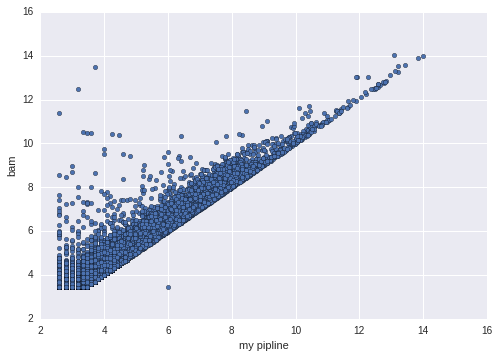

In [28]:
nonZeroDf.plot(x='my pipline',y='bam',kind='scatter')

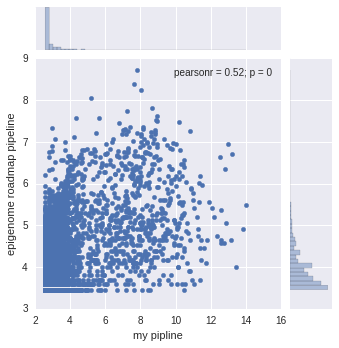

In [230]:
sns.jointplot(data=nonZeroDf,x='my pipline',y='epigenome roadmap pipeline',kind='scatter',size=5)

In [188]:
!tail ./out.sam

SRR458459.24991	0	chr1	155606334	35	36M	*	0	0	ACTGATACCCATTTGCATAAGAATAAGCCTGGGGAC	CCCFFFFFHHHHHJJJJJFHHIIJJJJJJJJJJJJJ	AS:i:0	XS:i:-11	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:36	YT:Z:UU
SRR458459.24992	0	chr11	25646441	42	36M	*	0	0	TCAAGGTGGAGCTCCATTGATTGGTTTAGTATTCAA	BBCFFFADHHHHHJJIJJCACHHJCGIHIAFIIJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:36	YT:Z:UU
SRR458459.24993	0	chr17	22248958	0	36M	*	0	0	TTTCCTGTGATGACTGCATTCAACTCACAGAGGTGA	CCCFFFFFHHHHHJJJJJIAFHIGIEJIJJJJJCGH	AS:i:-11	XS:i:-11	XN:i:0	XM:i:2	XO:i:0	XG:i:0	NM:i:2	MD:Z:3T28T3	YT:Z:UU
SRR458459.24994	0	chr14	19244945	1	36M	*	0	0	CTGGAATTCTACATGACGGACAAACCCTCAGAACCT	CCCFFFFFHHHHHJJJJJFCFHIJIIJJJIJJJJIH	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:36	YT:Z:UU
SRR458459.24995	16	chr6	138010846	42	36M	*	0	0	TAACTGAAGTGGAAAGGTCAGGATAAAATGTCAGCA	IIHJJJJJJJIJJIHFFAJJJJJHHHHHFFFFFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:36	YT:Z:UU
SRR458459.24996	16	chr6	27342918	42	36M	*	0	0	TAAGACGTGCAACTGACACTCAGCGCGCGGAGGA

In [ ]:
from multiprocessing import Process
import os
def stratChildren(cmd):
    def f():
        os.system(cmd) 
    p = Process(target=f)
    p.start()
    return p
stratChildren('./infin.sh')

In [66]:
import pandas as pd

In [70]:
#pd.read_csv('/cellar/users/btsui/Data/SRA/all_seq/chip/SRR458459.bin.co"unt.txt.gz',sep='\t')

In [ ]:
#bamCoverage -b reads.bam -o coverage.bg –binSize 20 –outFileFormat 'bedgraph'
#samtools index file_sorted.bam
#bamCoverage -b file_sorted.bam -o coverage.bg --binSize 20 --outFileFormat 'bedgraph'

In [71]:
#bamCoverage -b 

u'/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/Chip-seq'